In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsTransformer, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df =pd.read_csv('/content/drive/MyDrive/saglikta_yz/machineLearning/kalpHastalığıTespiti/heart_disease_uci.csv')

In [4]:
df

id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thalch  exang  oldpeak        slope   ca  \
0      lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1      lv hypertrophy   108.0   True      1.5         flat  3.0   
2      lv hypertrophy   129.0   True      2.6         flat  2.0   
3              normal   187.0  False      3.5  downsloping  0.0   
4      lv hypertrophy   172.0  False      1.4    upsloping  0.0   
..                ...     ...    ...      ...          ...  ...   
915  st-t abnormality   154.0  False      0.0          NaN  NaN   
916  st-t abnormality     NaN    NaN      NaN          NaN  NaN   
917  st-t abnormality   100.0  False      0.0          NaN  NaN   
918    lv hypertrophy     NaN    NaN      NaN          NaN  NaN   
919    lv hypertrophy    93.0   True      0.0          NaN  NaN   

                  thal  num  
0         fixed defect    0  
1               normal    2  
2    reversable defect    1  
3               normal    0  
4               normal    0  
..                 ...  ...  
915                NaN    1  
916                NaN    0  
917       fixed defect    2  
918                NaN    0  
919                NaN    1  

[920 rows x 16 columns]

In [5]:
df = df.drop(columns=['id'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [7]:
describe = df.describe().T
describe

count        mean         std   min    25%    50%    75%    max
age       920.0   53.510870    9.424685  28.0   47.0   54.0   60.0   77.0
trestbps  861.0  132.132404   19.066070   0.0  120.0  130.0  140.0  200.0
chol      890.0  199.130337  110.780810   0.0  175.0  223.0  268.0  603.0
thalch    865.0  137.545665   25.926276  60.0  120.0  140.0  157.0  202.0
oldpeak   858.0    0.878788    1.091226  -2.6    0.0    0.5    1.5    6.2
ca        309.0    0.676375    0.935653   0.0    0.0    0.0    1.0    3.0
num       920.0    0.995652    1.142693   0.0    0.0    1.0    2.0    4.0

<Figure size 640x480 with 0 Axes>

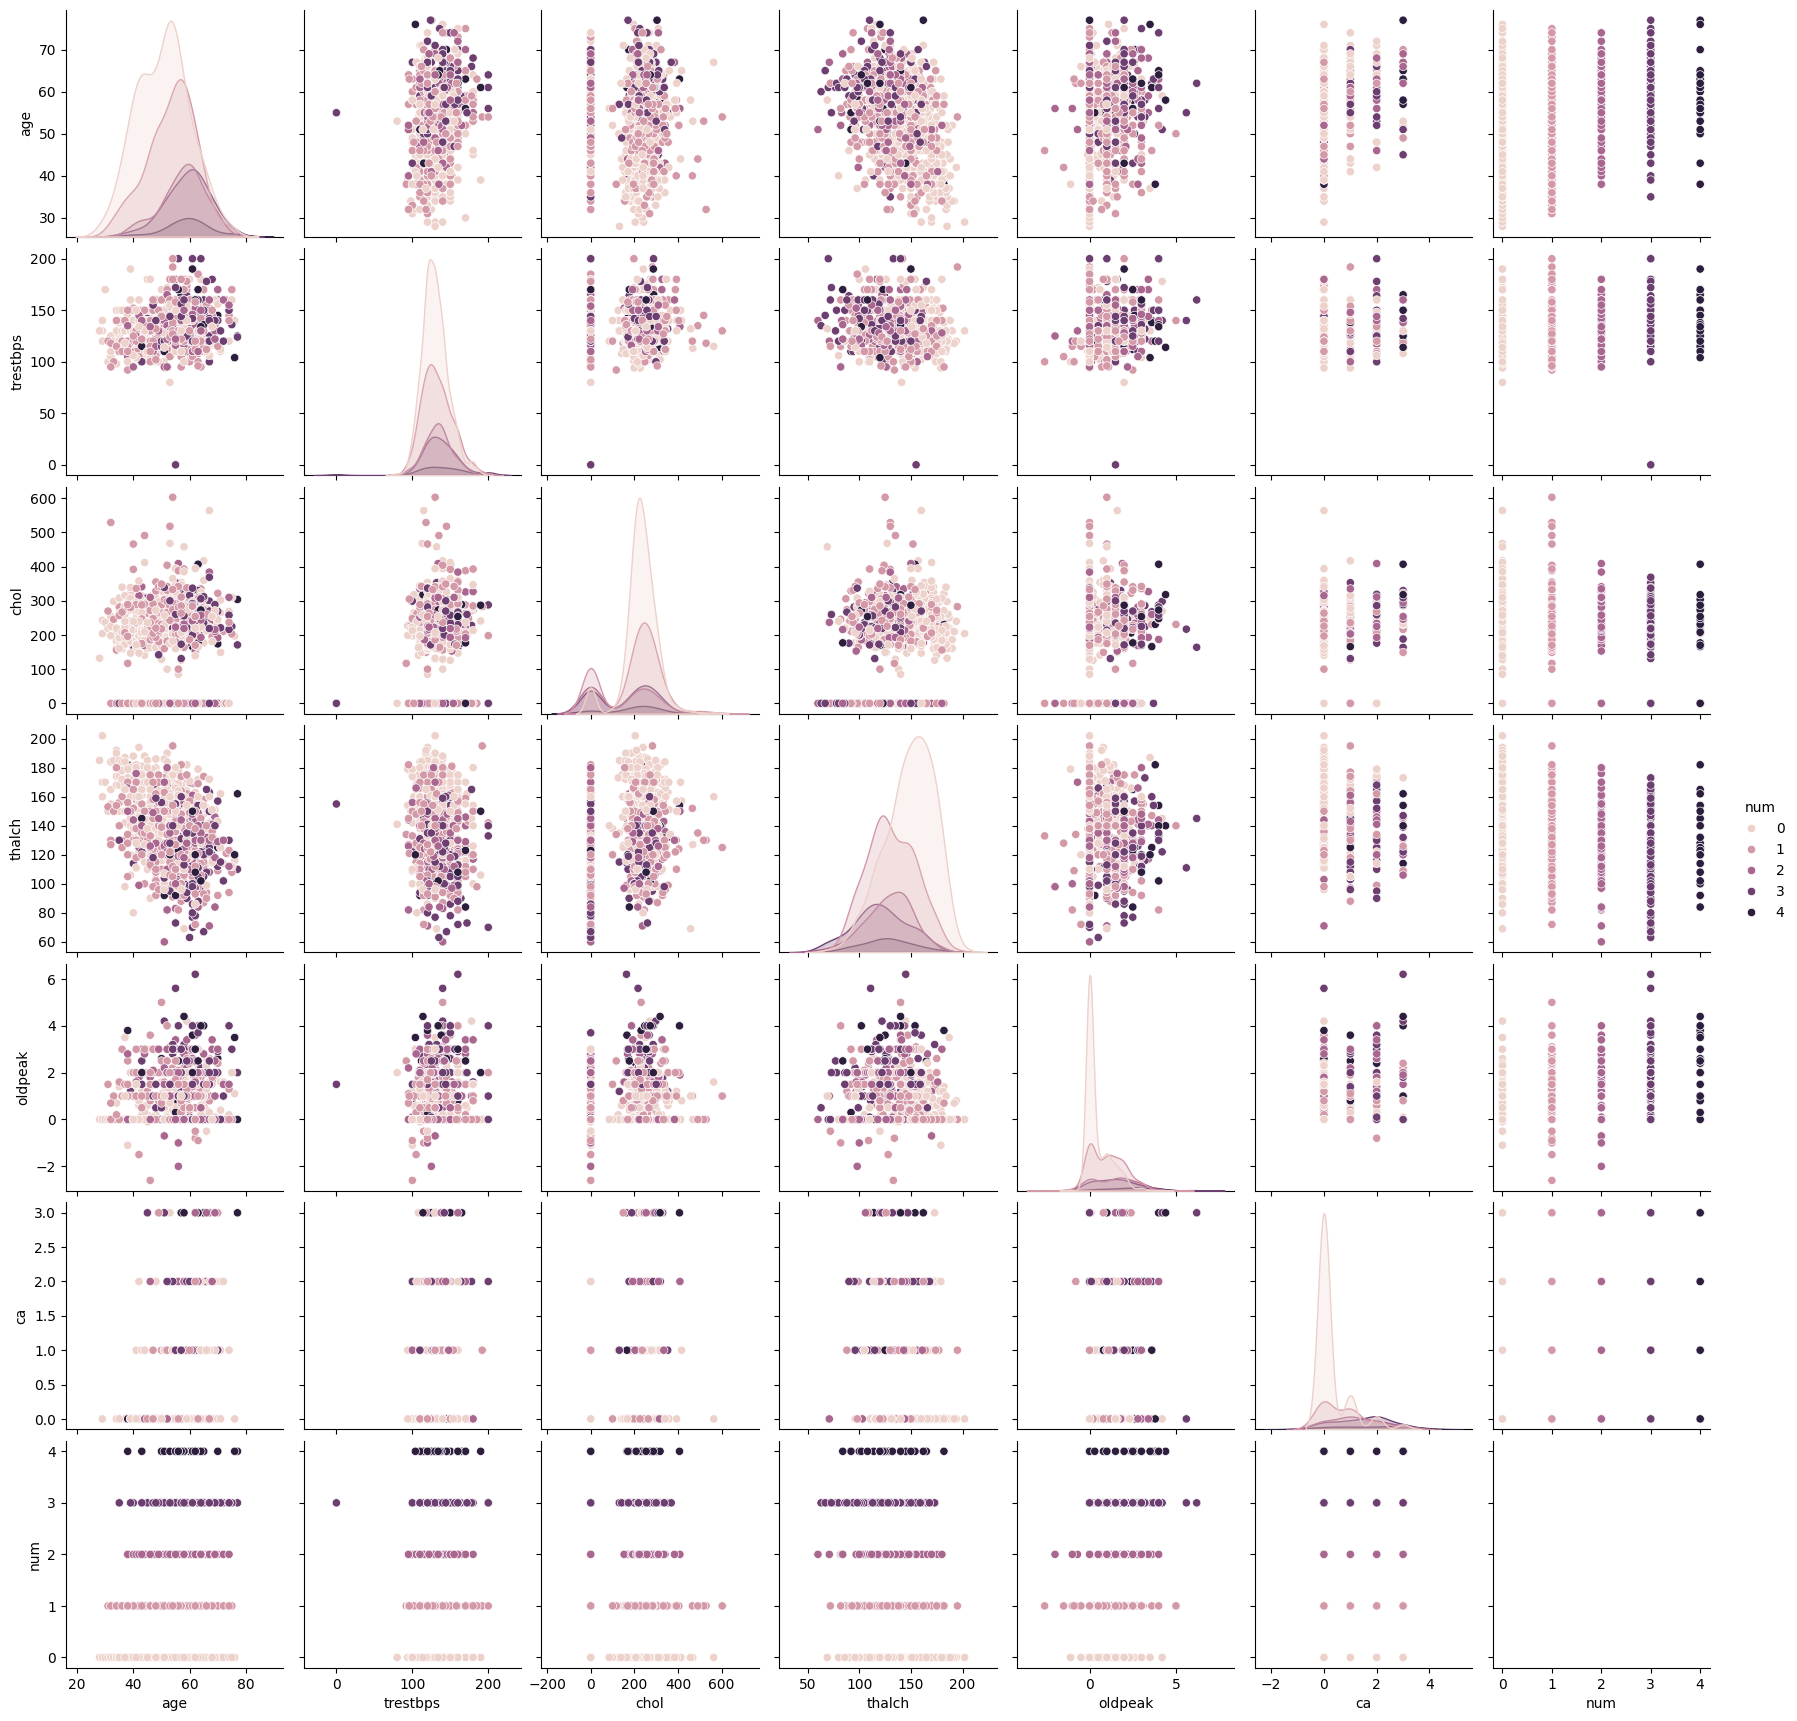

In [8]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
plt.figure()
sns.pairplot(df, vars=numerical_features, hue="num")
plt.show()

In [9]:
#handling missing value
df.isnull().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [10]:
df = df.drop(columns=['ca'])

In [11]:
df["trestbps"].fillna(df["trestbps"].median(), inplace = True)
df["chol"].fillna( df["chol"].median(), inplace = True)
df["fbs"].fillna(df["fbs"].mode()[0], inplace = True)
df["restecg"].fillna(df["restecg"].mode()[0], inplace = True)
df["thalch"].fillna( df["thalch"].median(), inplace = True)
df["exang"].fillna(df["exang"].mode()[0], inplace = True)
df["oldpeak"].fillna(df["oldpeak"].median(), inplace = True)
df["slope"].fillna( df["slope"].mode()[0], inplace = True)
df["thal"].fillna(df["thal"].mode()[0], inplace = True)

In [12]:
print(df.isnull().sum())

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


In [13]:
#train test split
X = df.drop(columns=['num'])
y = df['num']

In [14]:
y  #target data

0      0
1      2
2      1
3      0
4      0
      ..
915    1
916    0
917    2
918    0
919    1
Name: num, Length: 920, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
categorical_features= ["sex", "dataset", "cp", "restecg", "exang", "slope","thal"]
numerical_features = ["age", "trestbps", "chol", "fbs","thalch", "oldpeak"]

In [17]:
X_train_num = X_train[numerical_features]
X_test_num = X_test[numerical_features]

In [18]:
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [20]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_cat_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_cat_encoded = encoder.transform(X_test[categorical_features])

In [21]:
X_train_transformed = np.hstack((X_train_num_scaled, X_train_cat_encoded))
X_test_transformed = np.hstack((X_test_num_scaled, X_test_cat_encoded))

In [25]:
# modelleme: RF, KNN, Voting Classifier train ve test
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier()

In [27]:
voting_clf= VotingClassifier(estimators=[('rf', rf), ('knn', knn)], voting='soft')

In [28]:
voting_clf.fit(X_train_transformed, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

acc: 0.5706521739130435


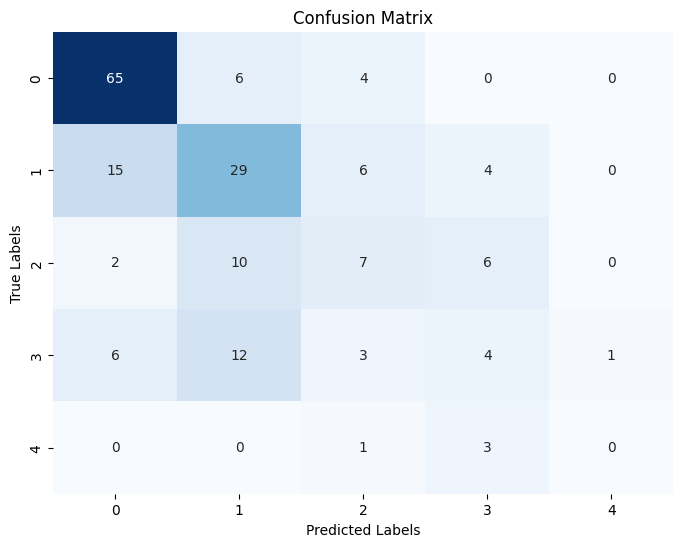

classification report:                precision    recall  f1-score   support

           0       0.74      0.87      0.80        75
           1       0.51      0.54      0.52        54
           2       0.33      0.28      0.30        25
           3       0.24      0.15      0.19        26
           4       0.00      0.00      0.00         4

    accuracy                           0.57       184
   macro avg       0.36      0.37      0.36       184
weighted avg       0.53      0.57      0.55       184



In [33]:
y_pred = voting_clf.predict(X_test_transformed)
print("acc:", accuracy_score(y_test, y_pred))
"""
print("confision matrix:",confusion_matrix(y_test, y_pred))
"""
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print("classification report: ",classification_report(y_test, y_pred))